In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = 'https://raw.githubusercontent.com/nadrowskyy/otomoto-scrap-analize/main/all_cars.csv'

In [3]:
df = pd.read_csv(file, low_memory=False, parse_dates=['Pierwsza rejestracja', 'Data dodania'])


In [4]:
df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')

In [5]:
df['ID'] = df['ID'].convert_dtypes()

In [6]:
df.drop_duplicates(subset=['ID'], keep=False)
df.dropna(subset=['ID'], inplace=True)

In [7]:
df.dropna(subset=['Cena'], inplace=True)

In [8]:
df


,ID,Marka,Model,Miasto,Wojewodztwo,Moc,Poj. sil,Cena,Waluta,Kraj poch.,...,Rodzaj paliwa,Emisja CO2,Typ,Kolor,Stan,Czy pierwsz. właśc,Napęd,Skrzynia biegów,Data dodania,Link
0,6084032404,abarth,124,Elbląg,Warmińsko-mazurskie,170.0,1368.0,104999.0,PLN,NaN,...,Benzyna,NaN,Kabriolet,Czarny,Używane,NaN,NaN,Manualna,2021-04-07 15:26:00,https://www.otomoto.pl/oferta/abarth-124-abart...
1,6083911812,abarth,500,Wągrowiec,Wielkopolskie,145.0,1368.0,69900.0,PLN,NaN,...,Benzyna,139.0,Auta małe,Biały,Używane,NaN,Na przednie koła,Manualna,2021-04-12 15:08:00,https://www.otomoto.pl/oferta/abarth-500-abart...
2,6083978833,abarth,500,Warszawa,Mazowieckie,140.0,1368.0,48900.0,PLN,NaN,...,Benzyna,NaN,Auta małe,Szary,Używane,NaN,Na przednie koła,Automatyczna,2021-04-12 12:46:00,https://www.otomoto.pl/oferta/abarth-500-abart...
3,6080145032,abarth,500,Szamotuły,Wielkopolskie,180.0,1398.0,46900.0,PLN,NaN,...,Benzyna,NaN,Auta małe,Czerwony,Używane,NaN,Na przednie koła,Automatyczna,2021-04-10 16:11:00,https://www.otomoto.pl/oferta/abarth-500-bardz...
4,6080419505,abarth,500,Gorlice,Małopolskie,185.0,1368.0,49900.0,PLN,Stany Zjednoczone,...,Benzyna,NaN,Auta małe,Żółty,Używane,NaN,Na przednie koła,Automatyczna,2021-04-09 10:33:00,https://www.otomoto.pl/oferta/abarth-500-abart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212902,6084195363,zuk,other,Włocławek,Kujawsko-pomorskie,70.0,2120.0,10900.0,PLN,Polska,...,Benzyna,NaN,Kombi,Inny kolor,Używane,NaN,Na tylne koła,Manualna,2021-04-12 14:43:00,https://www.otomoto.pl/oferta/zuk-zuk-a15-smut...
212903,6084139185,zuk,other,Pobierowo,Zachodniopomorskie,61.0,2417.0,2500.0,PLN,NaN,...,Diesel,NaN,SUV,Zielony,Używane,NaN,NaN,Manualna,2021-04-12 10:56:00,https://www.otomoto.pl/oferta/zuk-sprzedam-zuk...
212904,6082968006,zuk,other,Złotów,Wielkopolskie,60.0,2120.0,6900.0,PLN,NaN,...,Benzyna,NaN,SUV,Czerwony,Używane,NaN,NaN,Manualna,2021-04-08 17:32:00,https://www.otomoto.pl/oferta/zuk-ID6DFwRc.htm...
212905,6075025974,zuk,other,Koszalin,Zachodniopomorskie,70.0,2120.0,11900.0,PLN,NaN,...,Benzyna,NaN,Minivan,Czerwony,Używane,NaN,NaN,Manualna,2021-04-05 11:57:00,https://www.otomoto.pl/oferta/zuk-straz-pozarn...


In [9]:
df.groupby("Skrzynia biegów")

In [16]:
grouped = df.groupby("Skrzynia biegów")

In [13]:
df

,ID,Marka,Model,Miasto,Wojewodztwo,Moc,Poj. sil,Cena,Waluta,Kraj poch.,...,Rodzaj paliwa,Emisja CO2,Typ,Kolor,Stan,Czy pierwsz. właśc,Napęd,Skrzynia biegów,Data dodania,Link
0,6084032404,abarth,124,Elbląg,Warmińsko-mazurskie,170.0,1368.0,104999.0,PLN,NaN,...,Benzyna,NaN,Kabriolet,Czarny,Używane,NaN,NaN,Manualna,2021-04-07 15:26:00,https://www.otomoto.pl/oferta/abarth-124-abart...
1,6083911812,abarth,500,Wągrowiec,Wielkopolskie,145.0,1368.0,69900.0,PLN,NaN,...,Benzyna,139.0,Auta małe,Biały,Używane,NaN,Na przednie koła,Manualna,2021-04-12 15:08:00,https://www.otomoto.pl/oferta/abarth-500-abart...
2,6083978833,abarth,500,Warszawa,Mazowieckie,140.0,1368.0,48900.0,PLN,NaN,...,Benzyna,NaN,Auta małe,Szary,Używane,NaN,Na przednie koła,Automatyczna,2021-04-12 12:46:00,https://www.otomoto.pl/oferta/abarth-500-abart...
3,6080145032,abarth,500,Szamotuły,Wielkopolskie,180.0,1398.0,46900.0,PLN,NaN,...,Benzyna,NaN,Auta małe,Czerwony,Używane,NaN,Na przednie koła,Automatyczna,2021-04-10 16:11:00,https://www.otomoto.pl/oferta/abarth-500-bardz...
4,6080419505,abarth,500,Gorlice,Małopolskie,185.0,1368.0,49900.0,PLN,Stany Zjednoczone,...,Benzyna,NaN,Auta małe,Żółty,Używane,NaN,Na przednie koła,Automatyczna,2021-04-09 10:33:00,https://www.otomoto.pl/oferta/abarth-500-abart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212902,6084195363,zuk,other,Włocławek,Kujawsko-pomorskie,70.0,2120.0,10900.0,PLN,Polska,...,Benzyna,NaN,Kombi,Inny kolor,Używane,NaN,Na tylne koła,Manualna,2021-04-12 14:43:00,https://www.otomoto.pl/oferta/zuk-zuk-a15-smut...
212903,6084139185,zuk,other,Pobierowo,Zachodniopomorskie,61.0,2417.0,2500.0,PLN,NaN,...,Diesel,NaN,SUV,Zielony,Używane,NaN,NaN,Manualna,2021-04-12 10:56:00,https://www.otomoto.pl/oferta/zuk-sprzedam-zuk...
212904,6082968006,zuk,other,Złotów,Wielkopolskie,60.0,2120.0,6900.0,PLN,NaN,...,Benzyna,NaN,SUV,Czerwony,Używane,NaN,NaN,Manualna,2021-04-08 17:32:00,https://www.otomoto.pl/oferta/zuk-ID6DFwRc.htm...
212905,6075025974,zuk,other,Koszalin,Zachodniopomorskie,70.0,2120.0,11900.0,PLN,NaN,...,Benzyna,NaN,Minivan,Czerwony,Używane,NaN,NaN,Manualna,2021-04-05 11:57:00,https://www.otomoto.pl/oferta/zuk-straz-pozarn...


In [17]:

skrzynia = df["Skrzynia biegów"].value_counts(normalize=True) * 100

In [18]:

skrzynia

Manualna        64.037938
Automatyczna    35.962062
Name: Skrzynia biegów, dtype: float64

In [42]:
najw_km = df[['Marka', 'Model', 'Moc', 'Cena', 'Waluta']].nlargest(10, 'Moc')
najw_km

,Marka,Model,Moc,Cena,Waluta
46904,dodge,charger,885.0,310000.0,PLN
46971,dodge,charger,850.0,259000.0,PLN
47522,ferrari,488,800.0,1569000.0,PLN
47552,ferrari,488,800.0,738000.0,EUR
47562,ferrari,488,800.0,1299000.0,PLN
47585,ferrari,812-superfast,800.0,1569000.0,PLN
47586,ferrari,812-superfast,800.0,738000.0,EUR
47587,ferrari,812-superfast,800.0,1299000.0,PLN
106212,mercedes-benz,g-klasa,800.0,510000.0,EUR
187205,toyota,supra,799.0,550000.0,PLN


In [50]:
najdrozsze = df[['Marka', 'Model', 'Cena', 'Waluta', 'Stan']].nlargest(10, 'Cena')
najdrozsze

,Marka,Model,Cena,Waluta,Stan
108232,mercedes-benz,slr,3490000.0,PLN,Używane
147316,porsche,911,2583000.0,PLN,Używane
159396,rolls-royce,ghost,2370000.0,PLN,Nowe
159394,rolls-royce,cullinan,2330000.0,PLN,Nowe
89842,lamborghini,aventador,2300000.0,PLN,Używane
159416,rolls-royce,wraith,2101970.0,PLN,Nowe
159393,rolls-royce,cullinan,2100000.0,PLN,Używane
159419,rolls-royce,wraith,2013000.0,PLN,Nowe
159417,rolls-royce,wraith,1950000.0,PLN,Nowe
97320,mclaren,720s-spider,1862200.0,PLN,Nowe


In [38]:
zabytkowe = df[df['Czy zabytek'].apply(lambda x: x == True)] 

In [68]:
najdr_zabytki = zabytkowe[['Marka', 'Model', 'Rok prod.', 'Cena', 'Waluta', 'Czy zabytek']].nlargest(10, 'Cena')
najdr_zabytki

,Marka,Model,Rok prod.,Cena,Waluta,Czy zabytek
80254,jaguar,xk,1956.0,890000.0,PLN,True
79406,jaguar,e-type,1965.0,725000.0,PLN,True
47544,ferrari,488,1986.0,685000.0,PLN,True
47615,ferrari,testarossa,1986.0,685000.0,PLN,True
147275,porsche,911,1976.0,650000.0,PLN,True
66127,ford,mustang,1967.0,499000.0,PLN,True
66534,ford,mustang,1968.0,498000.0,PLN,True
66265,ford,mustang,1967.0,480000.0,PLN,True
147354,porsche,911,1968.0,455000.0,PLN,True
47500,ferrari,308,1978.0,390000.0,PLN,True


In [72]:
stan2 = df["Stan"].value_counts(normalize=True) * 100
stan2

Używane    87.721366
Nowe       12.278634
Name: Stan, dtype: float64

In [78]:
kraj = df["Kraj poch."].value_counts(normalize=True, ascending=True) * 100
kraj

Islandia              0.000818
Łotwa                 0.000818
Turcja                0.001637
Chorwacja             0.001637
Białoruś              0.001637
Bułgaria              0.001637
Węgry                 0.002455
Ukraina               0.002455
Liechtenstein         0.004092
Monako                0.004910
Grecja                0.005728
Estonia               0.006546
Litwa                 0.008183
Irlandia              0.009001
Rosja                 0.011456
Słowenia              0.020458
Norwegia              0.031914
Słowacja              0.039279
Finlandia             0.064647
Hiszpania             0.101471
Luksemburg            0.165299
Wielka Brytania       0.186575
Czechy                0.188211
Inny                  0.337144
Kanada                0.461527
Dania                 0.556451
Szwecja               0.603913
Austria               1.017978
Włochy                1.135815
Holandia              1.580976
Szwajcaria            1.876386
Stany Zjednoczone     3.332979
Belgia  

In [104]:
rok_p = pd.cut(df["Rok prod."], bins=[1914, 1940, 1960, 1980, 1990, 1995, 2000, 2005, 2010, 2015, 2016, 2017, 2018, 2019, 2020, 2021], labels=['1914-1940', '1940-1960', '1960-1980', '1980-1990', '1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015', '2016', '2017', '2018', '2019', '2020', '2021'], ordered=True).value_counts(normalize=True, sort=False) * 100
rok_p

1914-1940     0.010841
1940-1960     0.048080
1960-1980     0.300262
1980-1990     0.381809
1990-1995     0.530290
1995-2000     2.019345
2000-2005    10.055716
2005-2010    25.114071
2010-2015    24.469710
2016          5.966589
2017          6.763674
2018          4.822105
2019          4.290872
2020          8.392726
2021          6.833908
Name: Rok prod., dtype: float64

In [117]:
naj_modele = df[['Marka', 'Model']].value_counts(normalize=True, ascending=True).nlargest(10) * 100
naj_modele

Marka       Model  
opel        astra      2.536425
bmw         seria-3    2.165931
audi        a4         2.117380
volkswagen  golf       2.013208
            passat     1.901494
skoda       octavia    1.842573
ford        focus      1.727088
bmw         seria-5    1.718132
audi        a6         1.557396
ford        mondeo     1.491876
dtype: float64

In [62]:
df['Model'].value_counts(normalize=True).nlargest(10) * 100

astra      2.536425
seria-3    2.165931
a4         2.117380
golf       2.013208
passat     1.901494
octavia    1.842573
focus      1.727088
seria-5    1.718132
a6         1.557396
mondeo     1.491876
Name: Model, dtype: float64

In [65]:
kolor = df["Kolor"].value_counts(normalize=True) * 100
kolor

Czarny        24.174519
Szary         15.494770
Srebrny       14.682134
Biały         14.595874
Niebieski     10.357343
Inny kolor     6.519946
Czerwony       4.774946
Brązowy        2.717901
Zielony        1.758670
Bordowy        1.687493
Złoty          1.271276
Beżowy         1.155320
Żółty          0.444499
Fioletowy      0.365309
Name: Kolor, dtype: float64

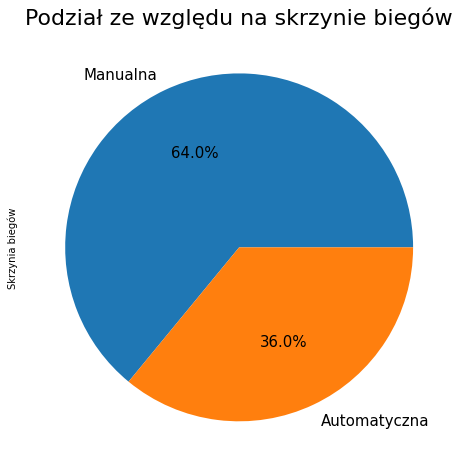

In [89]:
plot_1 = skrzynia.plot(kind='pie', figsize=(12,8),autopct='%1.1f%%', fontsize=15, title='Podział ze względu na skrzynie biegów')
plot_1.title.set_size(22)

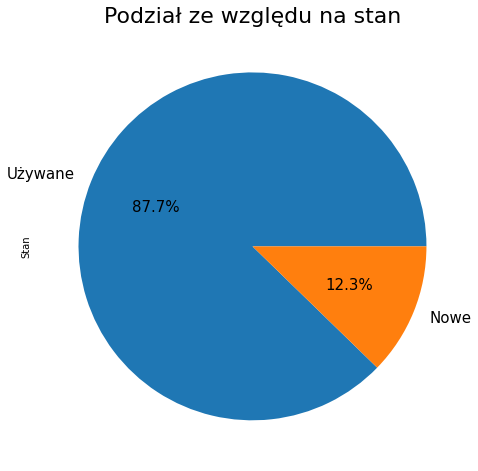

In [87]:
plot_2 = stan2.plot(kind='pie',autopct='%1.1f%%', figsize=(12,8), fontsize=15, title='Podział ze względu na stan')
plot_2.title.set_size(22)

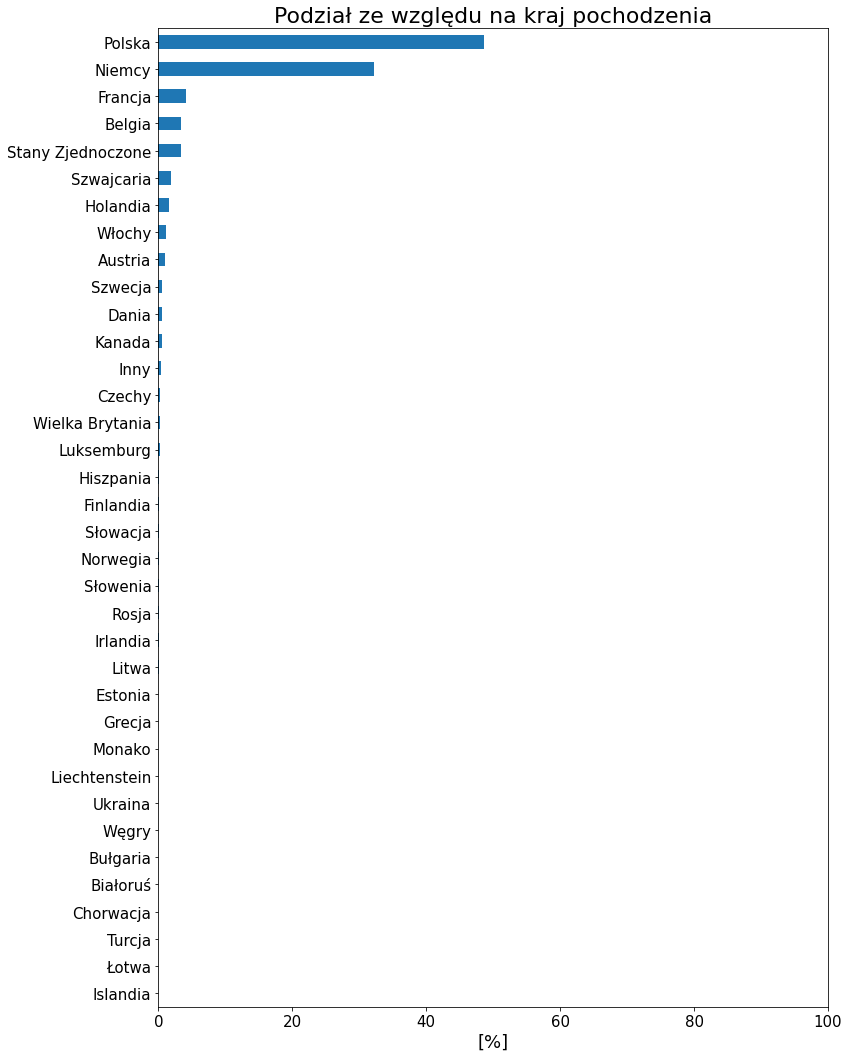

In [134]:
plot_3 = kraj.plot(kind='barh', figsize=(12,18), fontsize=15, xticks=[0, 20, 40, 60, 80, 100] ,title='Podział ze względu na kraj pochodzenia')
plot_3.set_xlabel("[%]", fontsize=18)
plot_3.title.set_size(22)

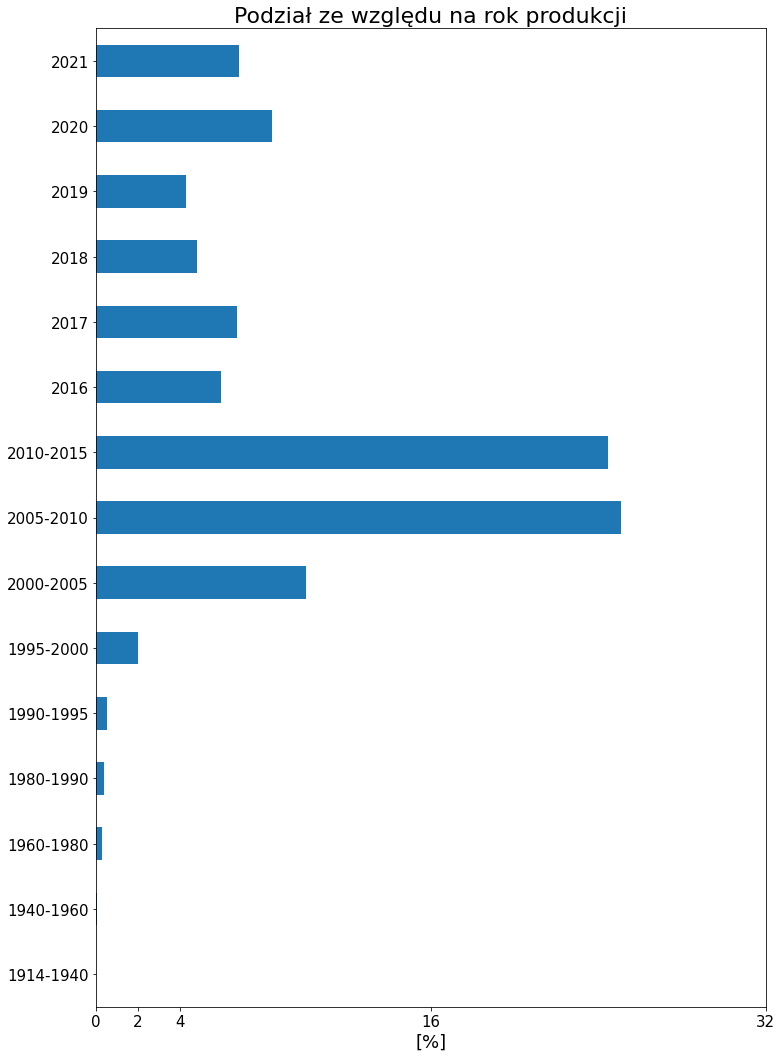

In [133]:
plot_4 = rok_p.plot(kind='barh', figsize=(12,18), fontsize=15, xticks=[0, 2, 4, 16, 32] ,title='Podział ze względu na rok produkcji')
plot_4.set_xlabel("[%]", fontsize=18)
plot_4.title.set_size(22)

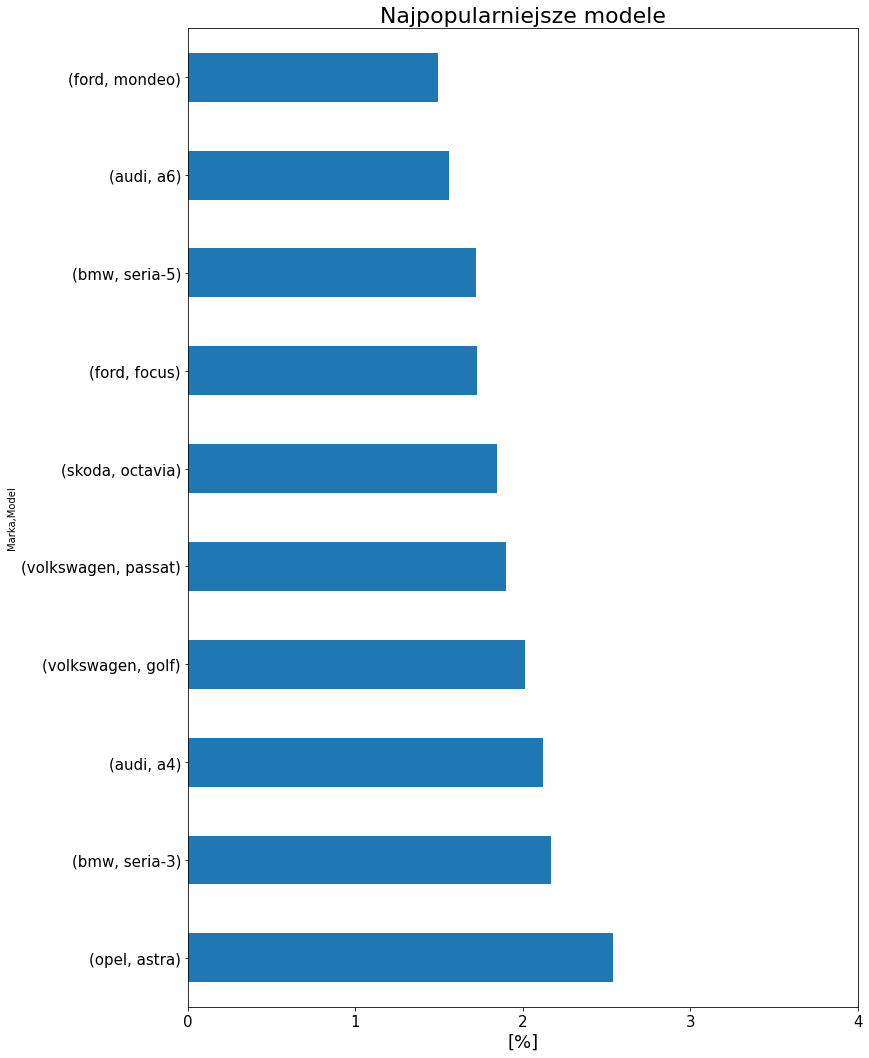

In [132]:
plot_5 = naj_modele.plot(kind='barh', figsize=(12,18), fontsize=15, xticks=[0, 1, 2, 3, 4] ,title='Najpopularniejsze modele')
plot_5.set_xlabel("[%]", fontsize=18)
plot_5.title.set_size(22)

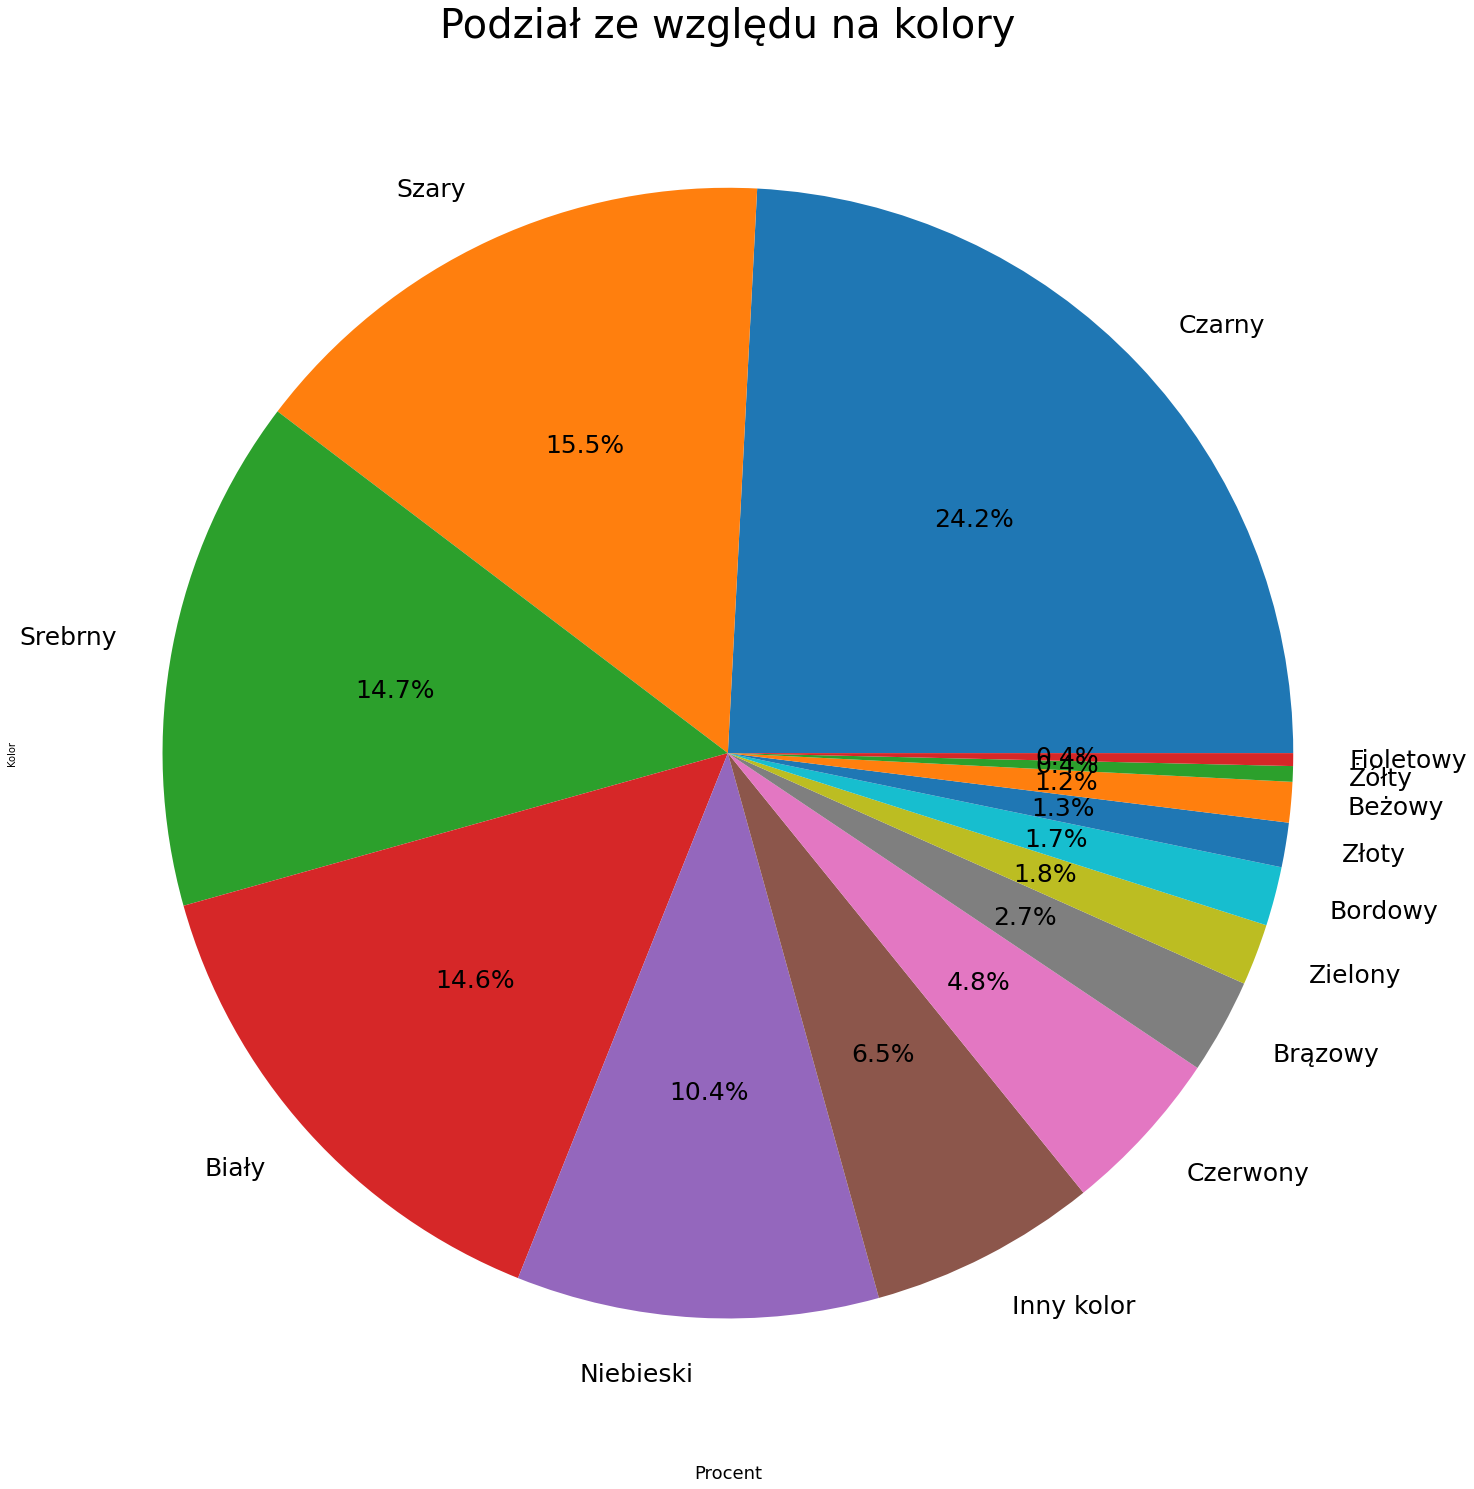

In [130]:
plot_6 = kolor.plot(kind='pie', figsize=(26,26), autopct='%1.1f%%', fontsize=25, title='Podział ze względu na kolory')
plot_6.set_xlabel("Procent", fontsize=18)
plot_6.title.set_size(40)

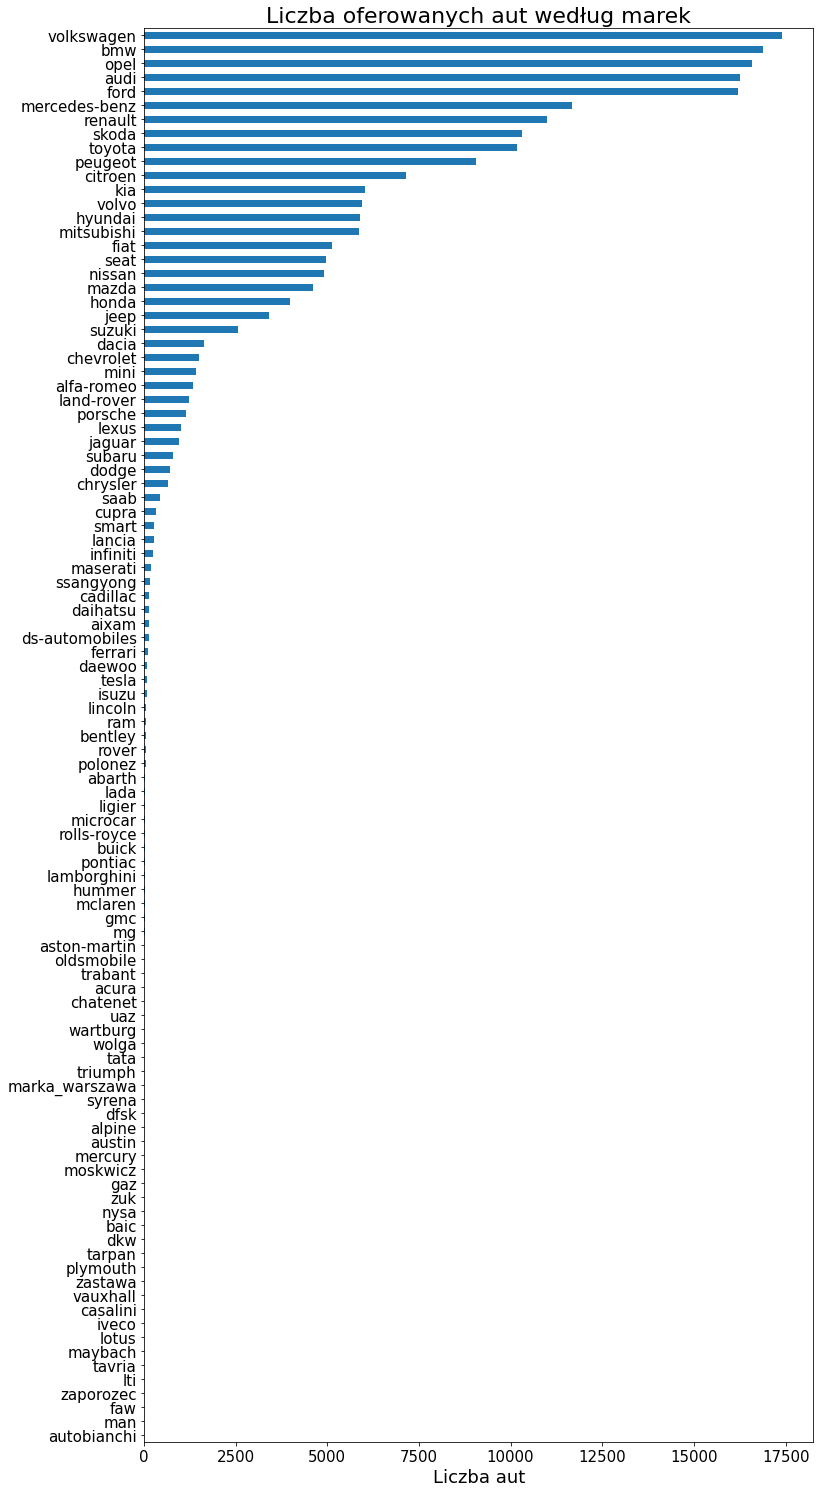

In [135]:
plot_7 = df['Marka'].value_counts(ascending=True).plot(kind='barh', figsize=(12,26), fontsize=15, title='Liczba oferowanych aut według marek')
plot_7.set_xlabel("Liczba aut", fontsize=18)
plot_7.title.set_size(22)

In [139]:
marka = df['Marka'].value_counts(normalize=True, ascending=True).nlargest(10) * 100
marka

volkswagen       8.197069
bmw              7.961857
opel             7.823747
audi             7.661125
ford             7.639442
mercedes-benz    5.502265
renault          5.181735
skoda            4.857435
toyota           4.796157
peugeot          4.271055
Name: Marka, dtype: float64

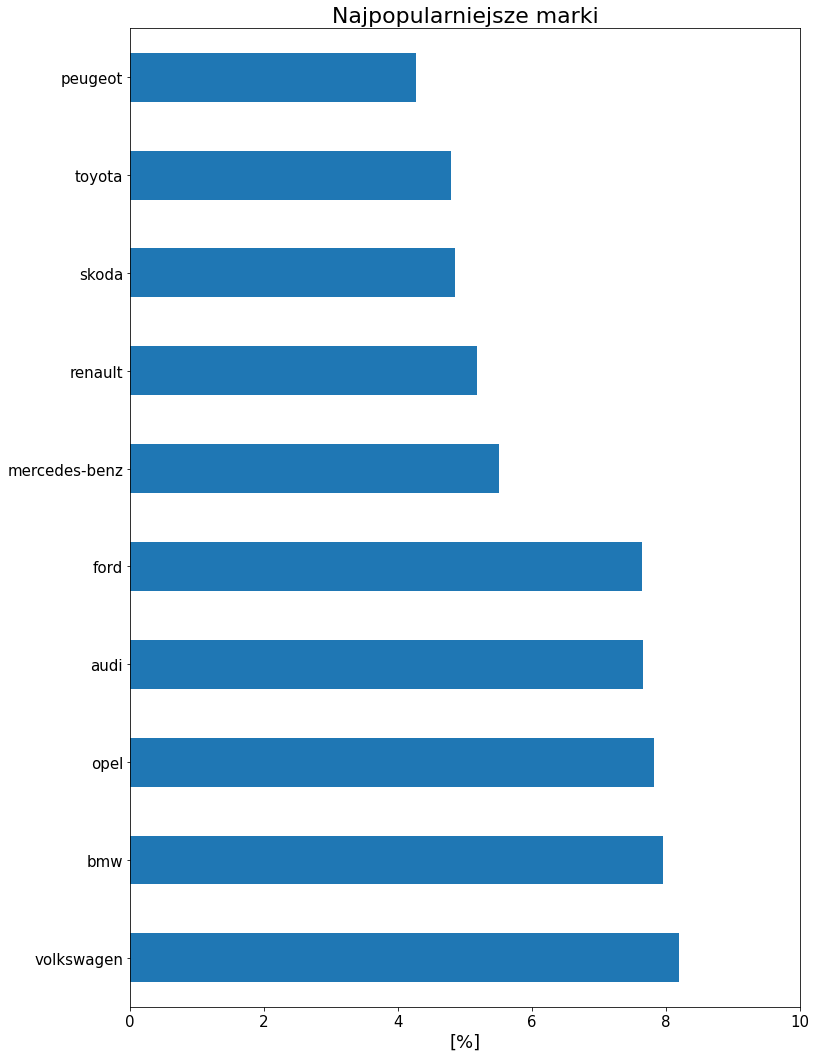

In [140]:
plot_8 = marka.plot(kind='barh', figsize=(12,18), fontsize=15, xticks=[0, 2, 4, 6, 8, 10] ,title='Najpopularniejsze marki')
plot_8.set_xlabel("[%]", fontsize=18)
plot_8.title.set_size(22)

In [144]:
cena = pd.cut(df['Cena'], bins=[0, 5000, 10000, 15000, 30000, 50000, 100000], labels=['0 - 5000', '5000 - 10000', '10000 - 15000', '15000 - 30000', '30000 - 50000', '50000 - 100000'], ordered=True).value_counts(normalize=True, sort=False) * 100
cena

0 - 5000           3.327844
5000 - 10000       9.822798
10000 - 15000     10.736257
15000 - 30000     29.492730
30000 - 50000     21.070683
50000 - 100000    25.549688
Name: Cena, dtype: float64

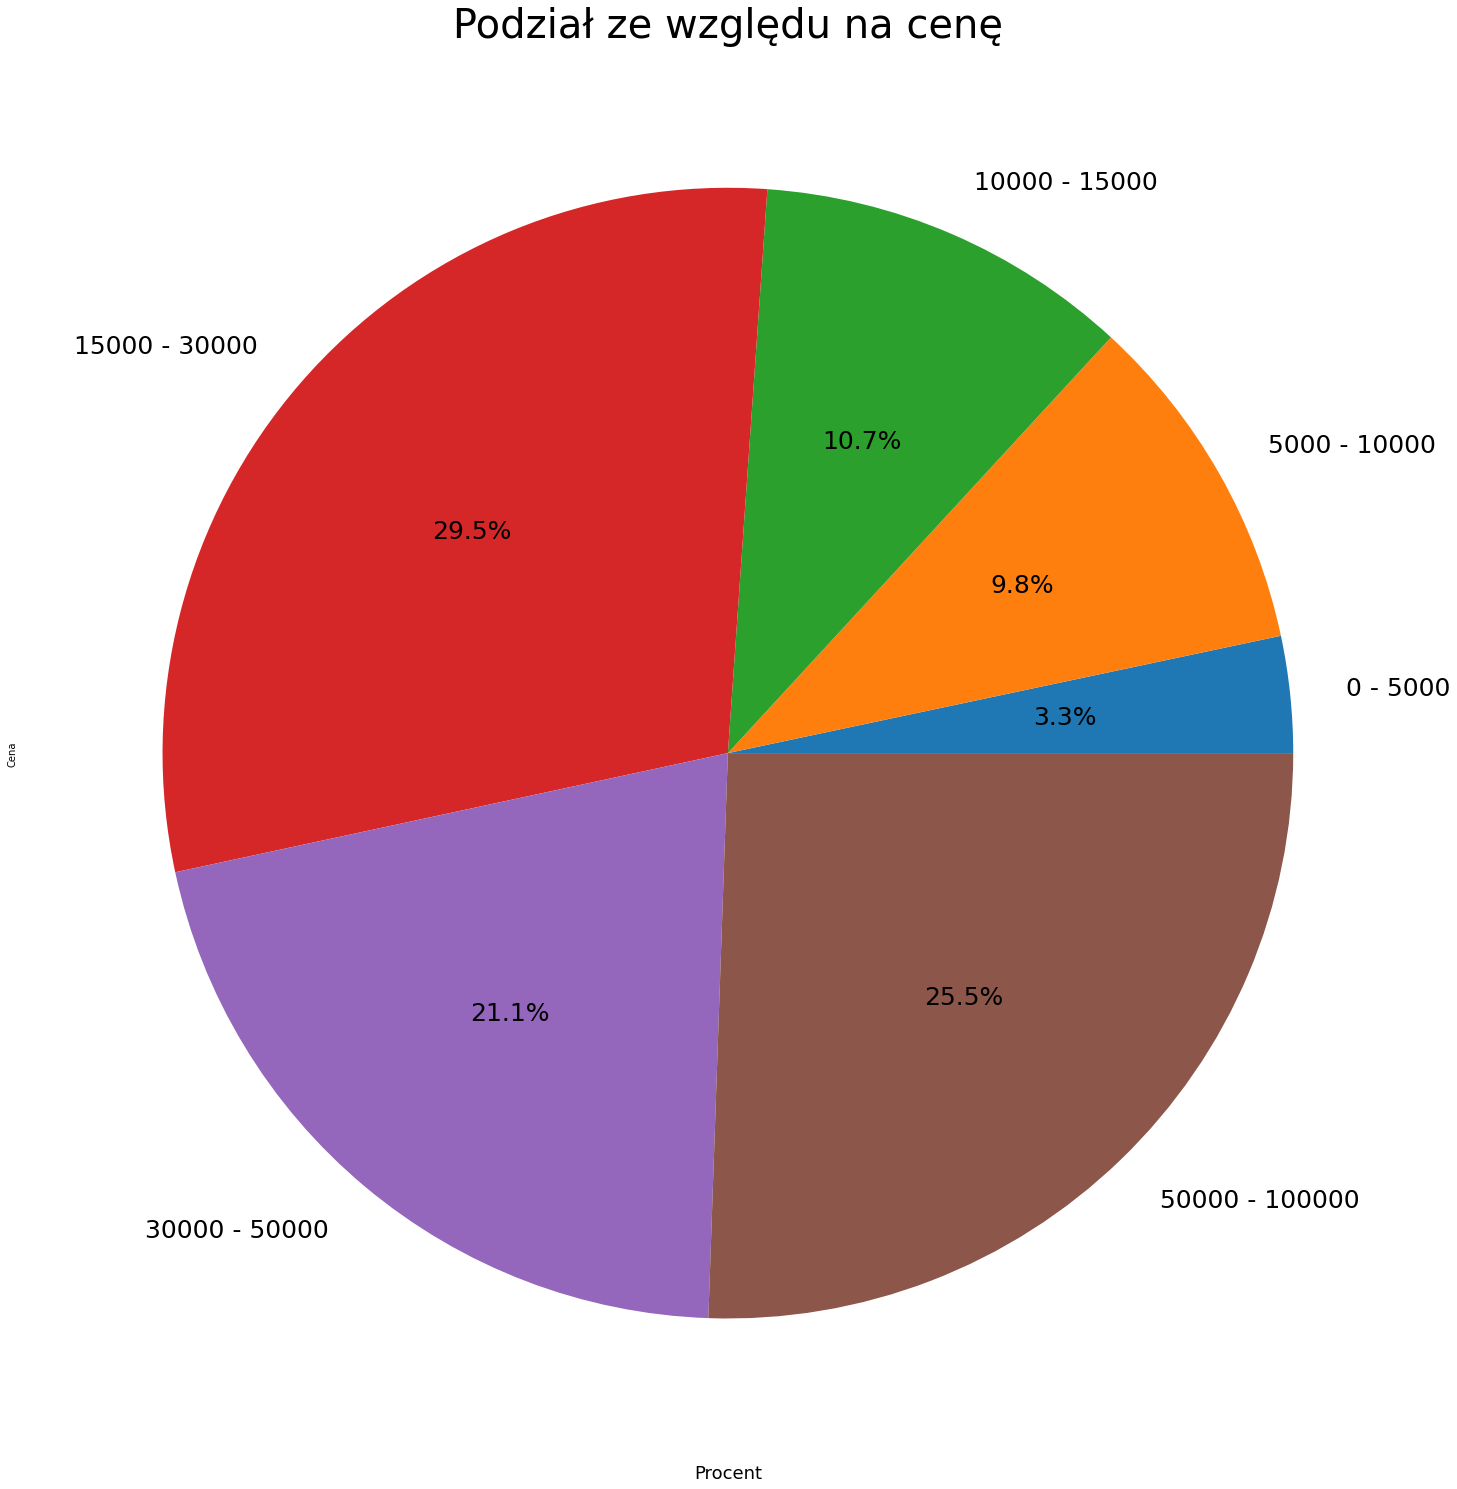

In [145]:
plot_9 = cena.plot(kind='pie', figsize=(26,26), autopct='%1.1f%%', fontsize=25, title='Podział ze względu na cenę')
plot_9.set_xlabel("Procent", fontsize=18)
plot_9.title.set_size(40)

In [147]:
paliwo = df['Rodzaj paliwa'].value_counts(normalize=True) * 100
paliwo

Benzyna        48.461223
Diesel         43.820145
Benzyna+LPG     4.293680
Hybryda         2.757967
Elektryczny     0.636345
Benzyna+CNG     0.029696
Etanol          0.000471
Wodór           0.000471
Name: Rodzaj paliwa, dtype: float64

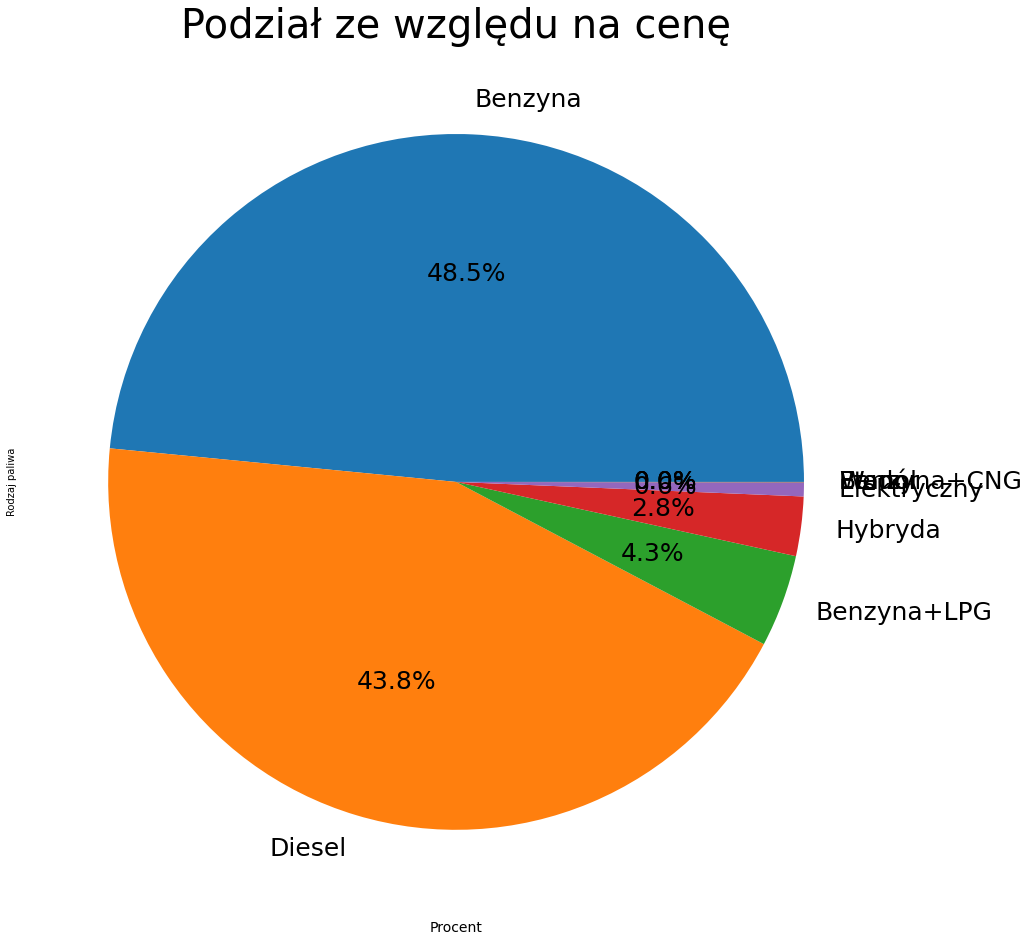

In [151]:
plot_10 = paliwo.plot(kind='pie', figsize=(16,16), autopct='%1.1f%%', fontsize=25, title='Podział ze względu na cenę')
plot_10.set_xlabel("Procent", fontsize=14)
plot_10.title.set_size(40)

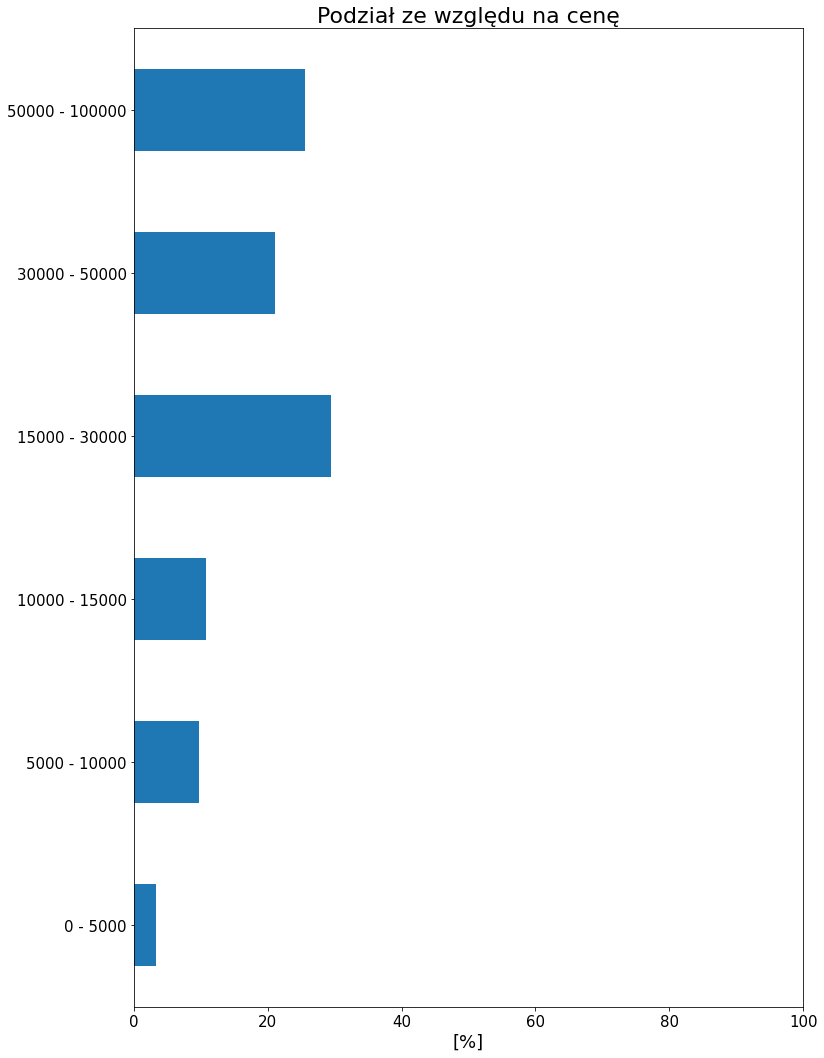

In [153]:
plot_11 = cena.plot(kind='barh', figsize=(12,18), fontsize=15, xticks=[0, 20, 40, 60, 80, 100] ,title='Podział ze względu na cenę')
plot_11.set_xlabel("[%]", fontsize=18)
plot_11.title.set_size(22)